<a href="https://colab.research.google.com/github/lxarmypythoncode/TCP/blob/main/tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah 1: Mengimpor Library yang Dibutuhkan
Pertama, kita perlu mengimpor beberapa library penting untuk mengolah data, membuat model, dan memvisualisasikan hasilnya:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib



Langkah 2: mengimport file data set yang real yaitu data csv

In [1]:
from google.colab import files

uploaded = files.upload()

Saving housing.csv to housing.csv


Langkah 3: Memuat Dataset
Kita akan memuat dataset yang sudah diunggah, menghapus data yang hilang (jika ada), dan memilih fitur yang akan digunakan.

In [3]:
# Load the dataset
import pandas as pd # Import the pandas library and alias it as 'pd'
df = pd.read_csv('housing.csv')

# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

# Menampilkan dataset
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


Langkah 4: Memilih Fitur dan Variabel Target
Di sini kita akan menggunakan kolom total_rooms, total_bedrooms, dan median_income sebagai variabel independen untuk memprediksi median_house_value.

In [4]:
# Memilih fitur dan target
X = df[['total_rooms', 'total_bedrooms', 'median_income']]  # Variabel independen
y = df['median_house_value']  # Variabel dependen


Langkah 5: Membagi Dataset ke Data Latih dan Data Uji
Kita akan membagi dataset menjadi 70% untuk pelatihan (train) dan 30% untuk pengujian (test).

In [6]:
# ipython-input-5-b4df115c700f

# Pastikan untuk mengimport train_test_split
from sklearn.model_selection import train_test_split # import train_test_split from the correct module

# Membagi data menjadi data latih (train) dan uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Langkah 6: Membuat dan Melatih Model
Pada tahap ini, kita akan melatih model regresi linier menggunakan data latih.

In [8]:
# Membuat model regresi linier
from sklearn.linear_model import LinearRegression # Import the LinearRegression class
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

LinearRegression()

Langkah 7: Memprediksi dan Mengevaluasi Model
Setelah melatih model, kita akan menggunakan data uji untuk memprediksi harga rumah, kemudian mengevaluasi performa model menggunakan nilai R-squared.

In [10]:
# Memprediksi harga rumah menggunakan data uji
y_pred = model.predict(X_test)

# Menampilkan koefisien regresi dan intercept
print(f"Koefisien: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Import r2_score from sklearn.metrics
from sklearn.metrics import r2_score

# Menghitung nilai R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Koefisien: [-3.06934797e+01  1.62759699e+02  4.88902849e+04]
Intercept: 11121.1673220878
R-squared: 0.5127259845190811


Langkah 8: Memvisualisasikan Hasil
Di sini kita akan memvisualisasikan prediksi model versus data aktual menggunakan scatter plot.

       Data Aktual       Prediksi
14416       245800  182528.818815
16383       137900  215606.238485
7731        218200  193045.429431
1410        220800  158759.763843
1335        170500  242181.555911


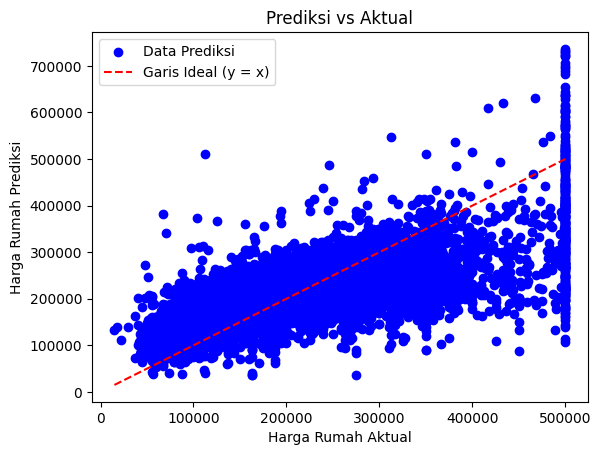

In [12]:
# Menampilkan hasil prediksi vs data aktual
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting
import pandas as pd # Import pandas for DataFrame operations

results = pd.DataFrame({'Data Aktual': y_test, 'Prediksi': y_pred})
print(results.head())

# Scatter plot antara harga rumah aktual dan prediksi
plt.scatter(y_test, y_pred, color='blue', label='Data Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Garis Ideal (y = x)')

# Menambahkan label dan judul
plt.xlabel("Harga Rumah Aktual")
plt.ylabel("Harga Rumah Prediksi")
plt.title("Prediksi vs Aktual")

# Menampilkan legend
plt.legend()
plt.show()

Langkah 9: Menyimpan Model
Setelah model dilatih, kita dapat menyimpannya ke dalam file .pkl untuk digunakan nanti.

In [14]:
# Menyimpan model ke dalam file .pkl
import joblib # Import the joblib library

joblib.dump(model, 'model_regresi_linier.pkl')

['model_regresi_linier.pkl']

Langkah 10: Menggunakan Model yang Disimpan
Terakhir, kita dapat memuat model yang telah disimpan dan menggunakannya untuk melakukan prediksi harga rumah berdasarkan inputan baru.

In [15]:
# Memuat model dari file
model = joblib.load('model_regresi_linier.pkl')

# Input data baru
total_rooms = int(input("Masukkan total ruangan: "))
total_bedrooms = int(input("Masukkan total kamar tidur: "))
median_income = float(input("Masukkan median pendapatan: "))

# Melakukan prediksi
prediksi = model.predict([[total_rooms, total_bedrooms, median_income]])
print(f"Prediksi harga rumah: {prediksi[0]}")


Masukkan total ruangan: 2
Masukkan total kamar tidur: 2
Masukkan median pendapatan: 2
Prediksi harga rumah: 109165.86959034996


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
